# Implementation exercise: KNN

Thomas Blocher (MatrNr. 03624034)
Raphael Dümig (MatrNr. 03623199)

In [2]:
import random
import numpy as np
import operator
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3.5/site-packages/sklearn/utils/fixes.py:64: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if 'order' in inspect.getargspec(np.copy)[0]:


## Load dataset
The iris data set (https://en.wikipedia.org/wiki/Iris_flower_data_set) it loaded by the function loadDataset.

Arguments:

* *split*: int Split rate between test and training set e.g. 0.67 corresponds to 1/3 test and 2/3 validation

Returns:

* *X*: list(array of length 4); Trainig data
* *Z*: list(int); Training labels
* *XT*: list(array of length 4); Test data
* *ZT*: list(int); Test labels

In [3]:
def loadDataset(split, X=[] , XT=[], Z = [], ZT = []):
    dataset = datasets.load_iris()
    c = list(zip(dataset['data'], dataset['target']))
    random.seed(224)
    random.shuffle(c)
    x, t = zip(*c)
    sp = int(split*len(c))
    X = x[:sp]
    XT = x[sp:]
    Z = t[:sp]
    ZT = t[sp:]
    return X, XT, Z, ZT

In [4]:
# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)

## Plot dataset
Since *X* is dimentionality 4, 16 scatterplots (4x4) are plotted showing the dependencies of each two features.

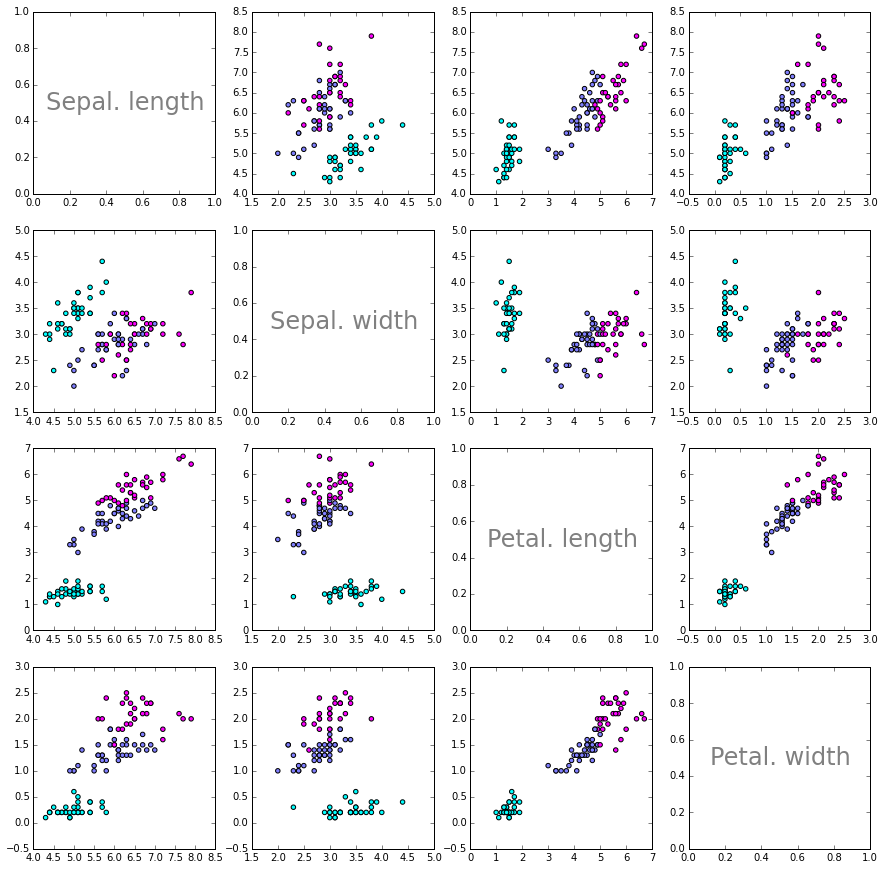

In [5]:
Xa = np.asarray(X)
f, axes = plt.subplots(4, 4,figsize=(15, 15))
for i in range(4):
    for j in range(4):
        if j == 0 and i == 0:
            axes[i,j].text(0.5, 0.5, 'Sepal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 1 and i == 1:
            axes[i,j].text(0.5, 0.5, 'Sepal. width', ha='center', va='center', size=24, alpha=.5)
        elif j == 2 and i == 2:
            axes[i,j].text(0.5, 0.5, 'Petal. length', ha='center', va='center', size=24, alpha=.5)
        elif j == 3 and i == 3:
            axes[i,j].text(0.5, 0.5, 'Petal. width', ha='center', va='center', size=24, alpha=.5)
        else:
            axes[i,j].scatter(Xa[:,j],Xa[:,i], c = Z, cmap=plt.cm.cool)

## Exercise 1: Euclidean distance
Compute euclidean distance between two data points.

arguments:
* *x1*: array of length 4; data point
* *x2*: array of length 4; data point

returns:
* *distance*:int; euclidean distance between *x1* and *x2* 

In [7]:
def euclideanDistance(x1, x2):
    d = x1-x2
    return np.sqrt(np.sum(d*d, axis=-1))

## Exercise 2: get k nearest neighbours
For one data point xt compute all k nearest neighbours.

arguments:
* *X*: list(array of length 4); Training data
* *Z*: list(int); Training labels
* *xt*: array of length 4; Test data point

returns:
* neighbours: list of length *k* of tuples (X_neighbor, Z_neighbor, distance between neighbor and xt); **this is the list of k nearest neighbours to xt**

In [10]:
def getNeighbors(X, Z, xt, k):
    dists = euclideanDistance(X, xt)
    
    return [(X[i], Z[i], dists[i]) for i in np.argsort(dists)[:k]]

## Exercise 3: get neighbor response
For the previously computed k nearest neighbors compute the actual response. I.e. give back the class of the majority of nearest neighbors. What do you do with a tie?

arguments:
* neighbors

returns
* y: int; majority target

In [16]:
from collections import defaultdict

def getResponse(neighbors):
    l = {}
    for n in neighbors:
        try:
            l[n[1]] += 1
        except KeyError:
            l[n[1]] = 1
    
    n_max = max(l.values())
    max_labels = list(filter(lambda k: l[k] == n_max, l.keys()))
    
    return max_labels[0]

## Exercise 4: Compute accuracy

arguments:
* YT:list(int); predicted targets
* ZT:list(int); actual targets

returns:
* accuracy (percentage of correctly classified test data points)

In [12]:
def getAccuracy(YT, ZT):
    return np.sum(np.asarray(YT) == np.asarray(ZT)) / len(YT)

In [13]:
def predict(X, Z, XT, k):
    Y=[]
    for xt in XT:
        neighbors = getNeighbors(X, Z, xt, k)
        Y.append(getResponse(neighbors))
    return Y

## Testing
Should output an accuracy of 0.95999999999999996%.

In [17]:
# prepare data
split = 0.67
X, XT, Z, ZT = loadDataset(split)
print('Train set: ' + repr(len(X)))
print('Test set: ' + repr(len(XT)))
# generate predictions
k = 3
YT = predict(X, Z, XT, k)
accuracy = getAccuracy(YT, ZT)
print('Accuracy: ' + repr(accuracy) + '%')

Train set: 100
Test set: 50
Accuracy: 0.95999999999999996%
